In [255]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations
from operator import itemgetter, attrgetter

from scipy.spatial.distance import cdist

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import pairwise_distances, accuracy_score
from scipy.spatial.distance import cdist, pdist
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set_context('poster')
sns.set_style('white')

In [256]:
dataFile = 'data.mat'

In [257]:
file = h5py.File(dataFile,'r')
experimentData = file['experimentData']
keys = list(experimentData.keys())

In [258]:
numTrials, numPositions, numGestures = experimentData[keys[0]].shape
D = file[experimentData[keys[4]][0,0,0]].shape[1]
numEx = 80

# color palettes for plotting
gPalette = sns.color_palette('tab20', numGestures)
pPalette = sns.color_palette('tab20', numPositions)

In [259]:
totalEx = numEx*numGestures*numPositions*numTrials
accFeat = np.zeros((totalEx,3))
gestLabel = np.zeros(totalEx)
posLabel = np.zeros(totalEx)
groupLabel = np.zeros(totalEx)
idx = np.arange(numEx).astype('int')
for g in range(numGestures):
    for p in range(numPositions):
        for t in range(numTrials):
            expLabel = file[experimentData['expGestLabel'][t,p,g]][0,:]
            accFeat[idx,:] = file[experimentData['accFeat'][t,p,g]][:,expLabel>0].T
            gestLabel[idx] = g
            posLabel[idx] = p
            groupLabel[idx] = g + p*numGestures
            idx += numEx
            
lda = LDA(n_components=3)
accLDA = lda.fit_transform(accFeat,posLabel)

pca = PCA(n_components=3)
accPCA = pca.fit_transform(accFeat)

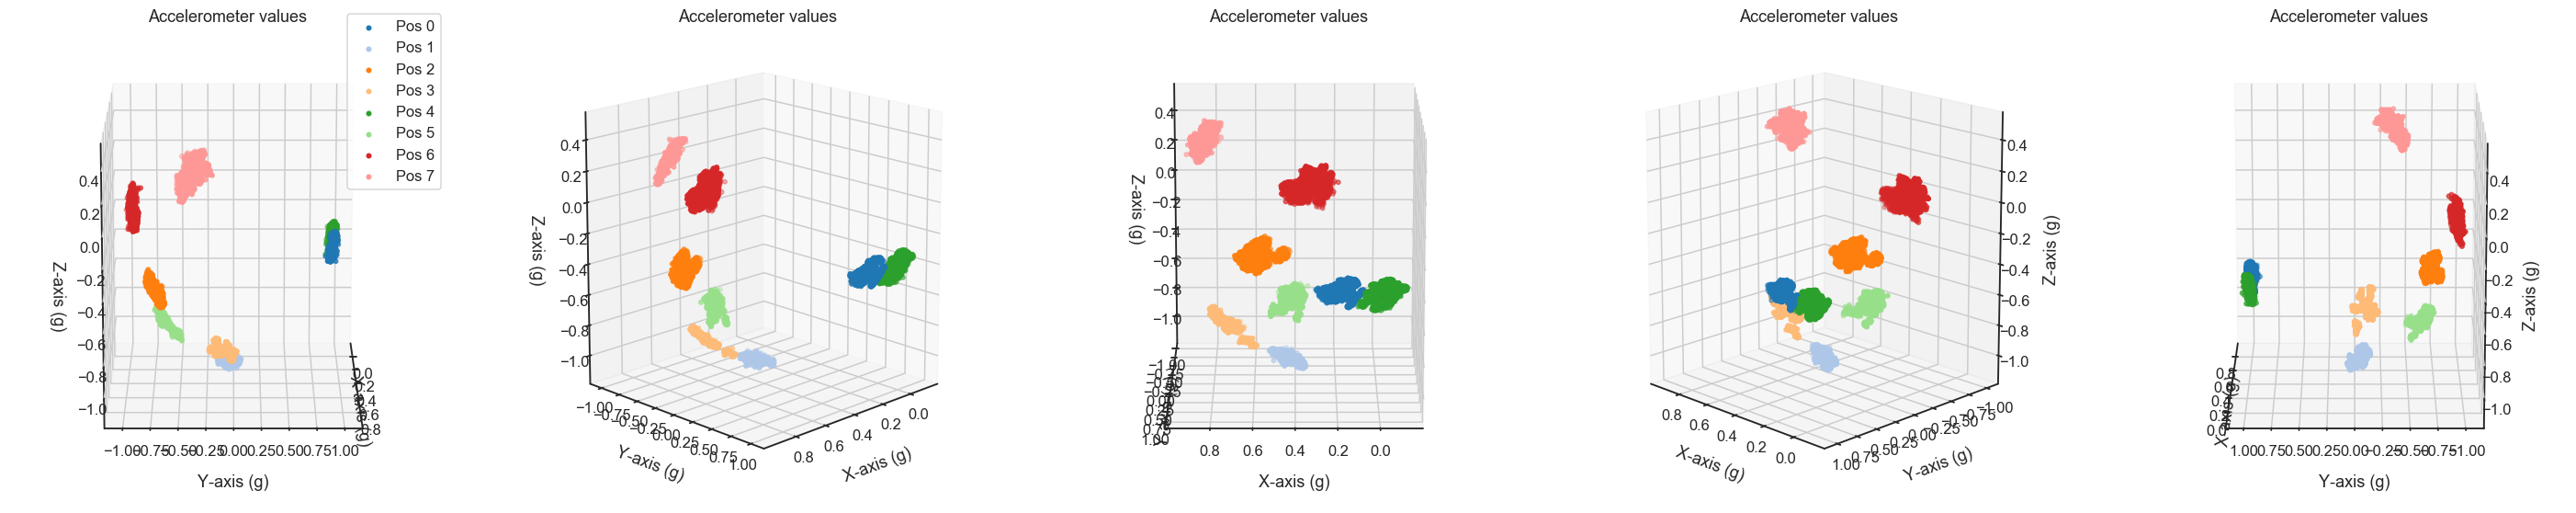

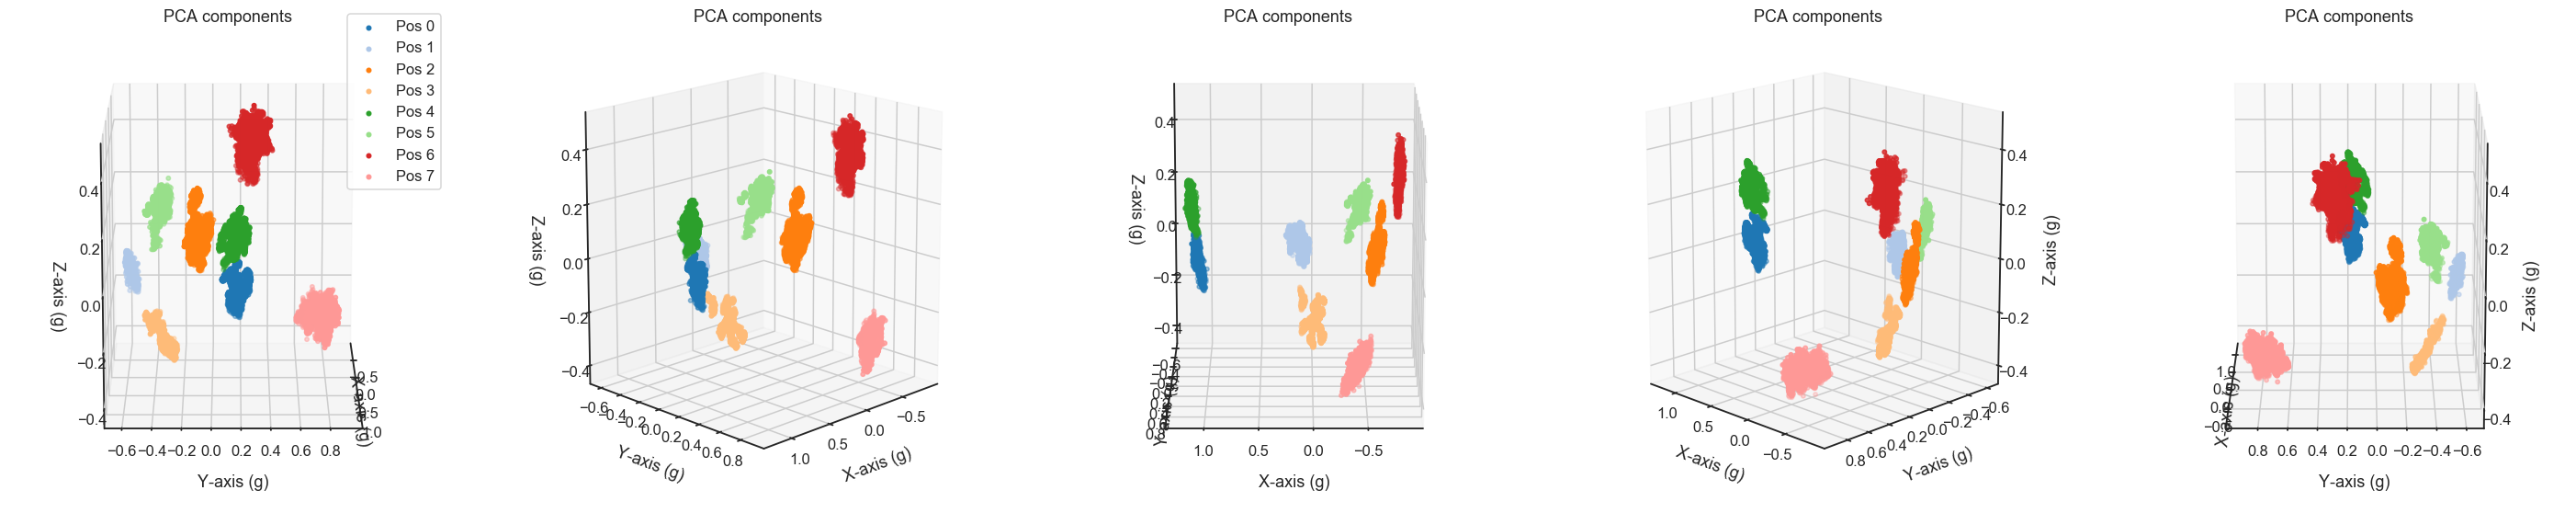

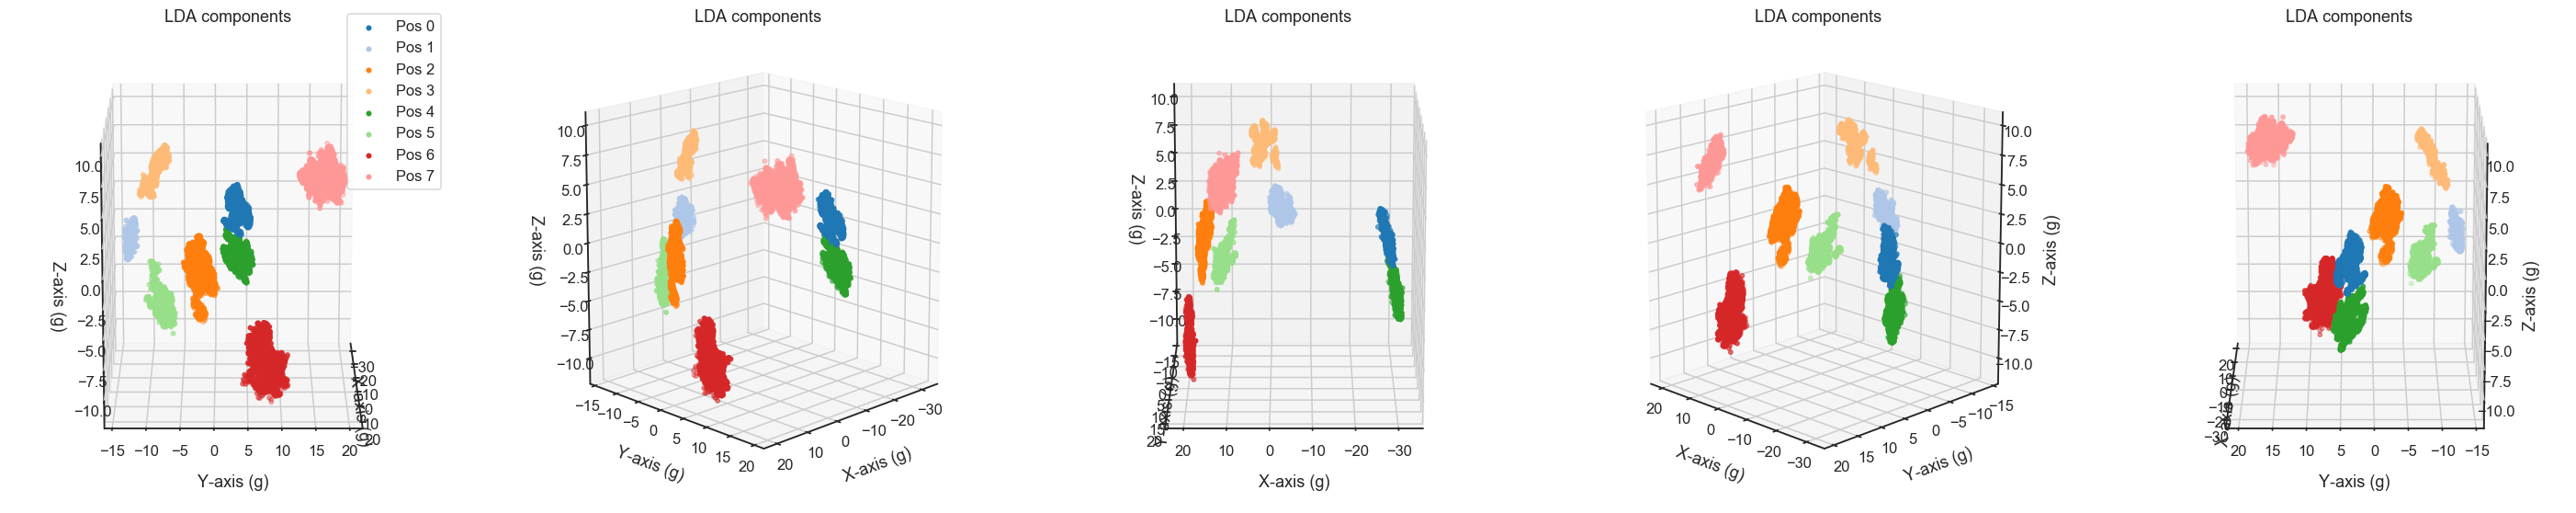

In [6]:
fig = plt.figure(figsize=(50,10))

NViews = 5
for i in range(NViews):
    ax = fig.add_subplot(1,NViews,i+1, projection='3d')
    for p in range(numPositions):
        ax.scatter(accFeat[posLabel==p,0],accFeat[posLabel==p,1],accFeat[posLabel==p,2],c=np.array(pPalette[p]).reshape(1,-1),label='Pos %d' % p)
        ax.view_init(15, i*45)
    if i == 0:
        ax.legend()
#     ax.set_xlim((-1,1))
#     ax.set_ylim((-1,1))
#     ax.set_zlim((-1,1))
#     ax.set_xticks([-1,0,1])
#     ax.set_yticks([-1,0,1])
#     ax.set_zticks([-1,0,1])
    ax.set_xlabel('\n\nX-axis (g)')
    ax.set_ylabel('\n\nY-axis (g)')
    ax.set_zlabel('\n\nZ-axis (g)')
    ax.set_title('Accelerometer values\n')

plt.show()

fig = plt.figure(figsize=(50,10))

NViews = 5
for i in range(NViews):
    ax = fig.add_subplot(1,NViews,i+1, projection='3d')
    for p in range(numPositions):
        ax.scatter(accPCA[posLabel==p,0],accPCA[posLabel==p,1],accPCA[posLabel==p,2],c=np.array(pPalette[p]).reshape(1,-1),label='Pos %d' % p)
        ax.view_init(15, i*45)
    if i == 0:
        ax.legend()
#     ax.set_xlim((-1,1))
#     ax.set_ylim((-1,1))
#     ax.set_zlim((-1,1))
#     ax.set_xticks([-1,0,1])
#     ax.set_yticks([-1,0,1])
#     ax.set_zticks([-1,0,1])
    ax.set_xlabel('\n\nX-axis (g)')
    ax.set_ylabel('\n\nY-axis (g)')
    ax.set_zlabel('\n\nZ-axis (g)')
    ax.set_title('PCA components\n')

plt.show()

fig = plt.figure(figsize=(50,10))

NViews = 5
for i in range(NViews):
    ax = fig.add_subplot(1,NViews,i+1, projection='3d')
    for p in range(numPositions):
        ax.scatter(accLDA[posLabel==p,0],accLDA[posLabel==p,1],accLDA[posLabel==p,2],c=np.array(pPalette[p]).reshape(1,-1),label='Pos %d' % p)
        ax.view_init(15, i*45)
    if i == 0:
        ax.legend()
#     ax.set_xlim((-1,1))
#     ax.set_ylim((-1,1))
#     ax.set_zlim((-1,1))
#     ax.set_xticks([-1,0,1])
#     ax.set_yticks([-1,0,1])
#     ax.set_zticks([-1,0,1])
    ax.set_xlabel('\n\nX-axis (g)')
    ax.set_ylabel('\n\nY-axis (g)')
    ax.set_zlabel('\n\nZ-axis (g)')
    ax.set_title('LDA components\n')

plt.show()

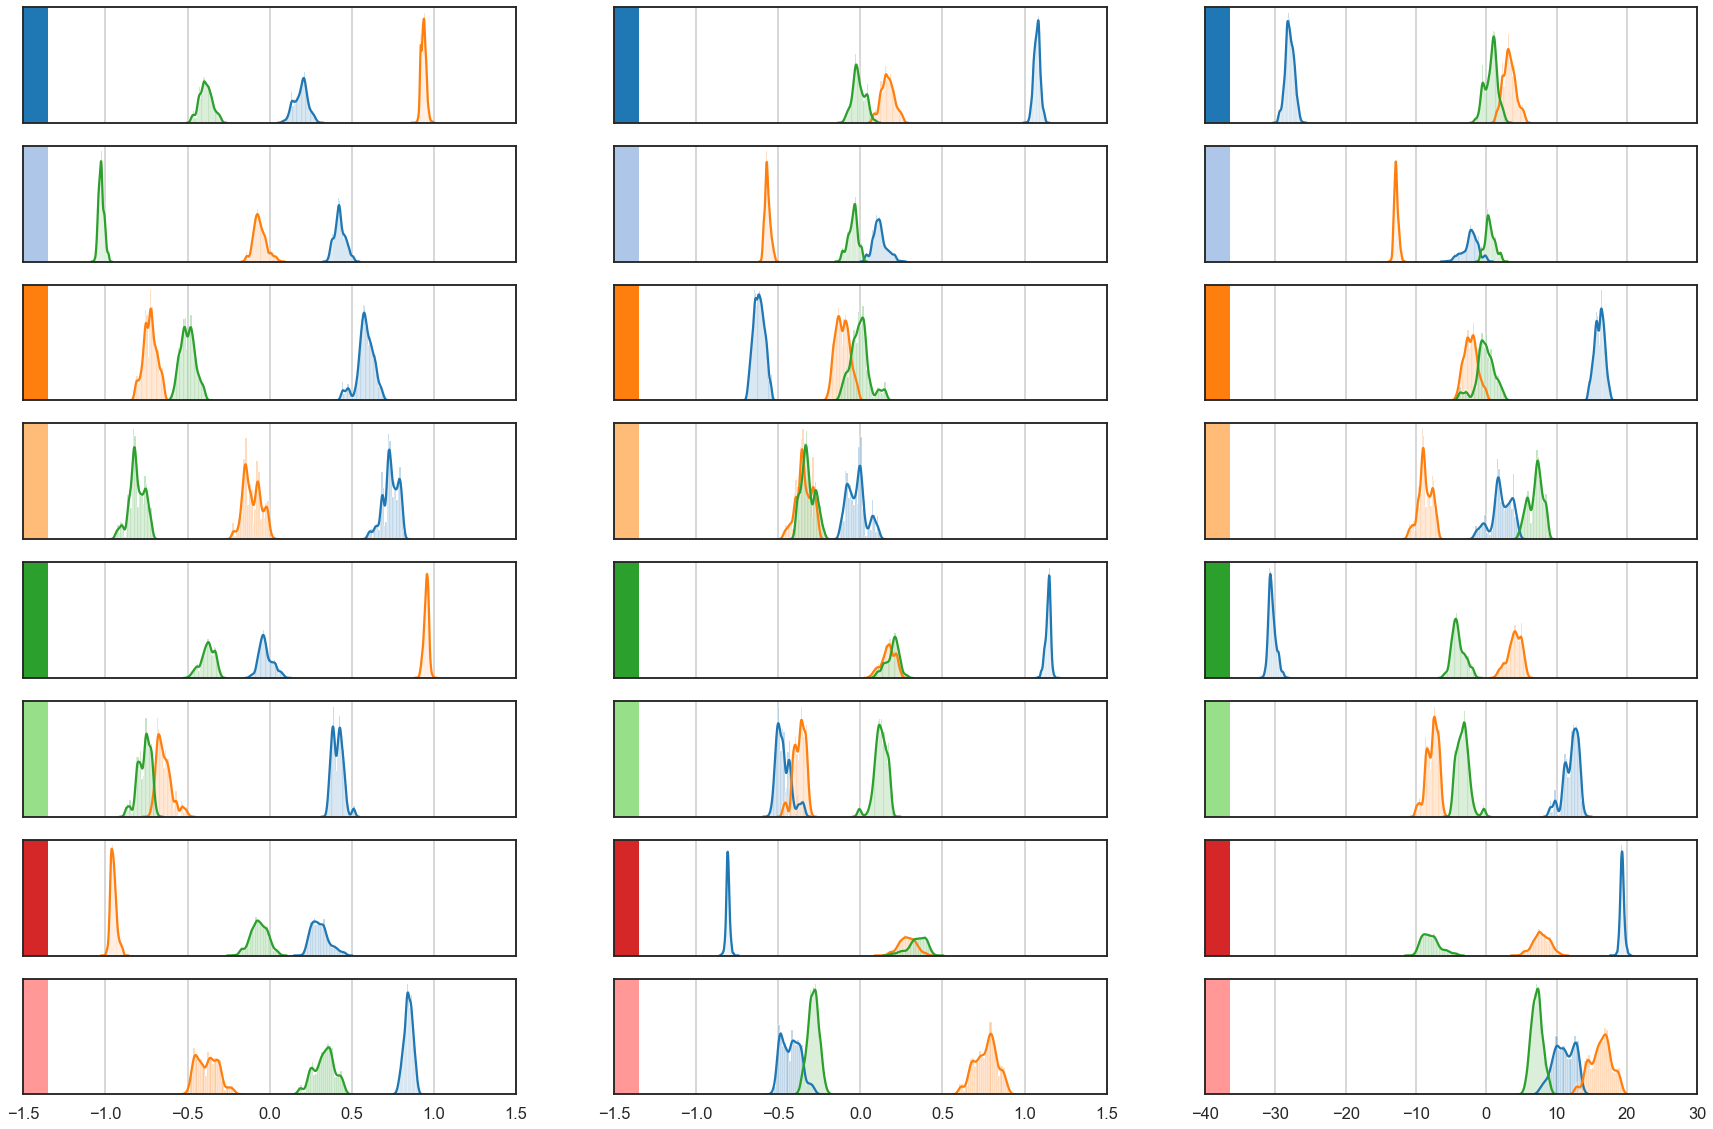

In [7]:
f,ax = plt.subplots(8,3,figsize=(30,20))

for p in range(numPositions):
    sns.distplot(accFeat[(posLabel == p),0],ax=ax[p,0])
    sns.distplot(accFeat[(posLabel == p),1],ax=ax[p,0])
    sns.distplot(accFeat[(posLabel == p),2],ax=ax[p,0])
    ax[p,0].set_xlim((-1.5,1.5))
    ax[p,0].set_yticks([])
    if p != numPositions-1:
        ax[p,0].set_xticklabels([])
    ax[p,0].axvline(x=-1.5,linewidth=50, color=pPalette[p])
    ax[p,0].xaxis.grid(True)
    
for p in range(numPositions):
    sns.distplot(accPCA[(posLabel == p),0],ax=ax[p,1])
    sns.distplot(accPCA[(posLabel == p),1],ax=ax[p,1])
    sns.distplot(accPCA[(posLabel == p),2],ax=ax[p,1])
    ax[p,1].set_xlim((-1.5,1.5))
    ax[p,1].set_yticks([])
    if p != numPositions-1:
        ax[p,1].set_xticklabels([])
    ax[p,1].axvline(x=-1.5,linewidth=50, color=pPalette[p])
    ax[p,1].xaxis.grid(True)
    
for p in range(numPositions):
    sns.distplot(accLDA[(posLabel == p),0],ax=ax[p,2])
    sns.distplot(accLDA[(posLabel == p),1],ax=ax[p,2])
    sns.distplot(accLDA[(posLabel == p),2],ax=ax[p,2])
    ax[p,2].set_xlim((-40,30))
    ax[p,2].set_yticks([])
    if p != numPositions-1:
        ax[p,2].set_xticklabels([])
    ax[p,2].axvline(x=-40,linewidth=50, color=pPalette[p])
    ax[p,2].xaxis.grid(True)

In [260]:
maxLevels = 64
thresh = 0.3
posPairs = list(combinations(list(range(numPositions)),2))

xSplits = -2*np.ones((len(posPairs),maxLevels))
ySplits = -2*np.ones((len(posPairs),maxLevels))
zSplits = -2*np.ones((len(posPairs),maxLevels))

for N in range(maxLevels):
    xIdx = np.round(((accFeat[:,0] + 1)/2)*N)
    xHist = np.zeros((N+1,numPositions))
    for p in range(numPositions):
        h = np.histogram(xIdx[posLabel==p],bins=list(range(N+2)))
        xHist[:,p] = h[0]
        
    yIdx = np.round(((accFeat[:,1] + 1)/2)*N)
    yHist = np.zeros((N+1,numPositions))
    for p in range(numPositions):
        h = np.histogram(yIdx[posLabel==p],bins=list(range(N+2)))
        yHist[:,p] = h[0]
        
    zIdx = np.round(((accFeat[:,2] + 1)/2)*N)
    zHist = np.zeros((N+1,numPositions))
    for p in range(numPositions):
        h = np.histogram(zIdx[posLabel==p],bins=list(range(N+2)))
        zHist[:,p] = h[0]
    
    xValid = sum(np.max(xHist/np.sum(xHist,axis=0),axis=0) > thresh) == numPositions
    if xValid:
        xSplits[:,N] = 0
        binIdx = [np.argmax(b) for b in xHist.T]
        for i,p in enumerate(posPairs):
            if binIdx[p[0]] != binIdx[p[1]]:
                xSplits[i,N] = 1
        
    yValid = sum(np.max(yHist/np.sum(yHist,axis=0),axis=0) > thresh) == numPositions
    if yValid:
        ySplits[:,N] = 0
        binIdx = [np.argmax(b) for b in yHist.T]
        for i,p in enumerate(posPairs):
            if binIdx[p[0]] != binIdx[p[1]]:
                ySplits[i,N] = 1
                
    zValid = sum(np.max(zHist/np.sum(zHist,axis=0),axis=0) > thresh) == numPositions
    if zValid:
        zSplits[:,N] = 0
        binIdx = [np.argmax(b) for b in zHist.T]
        for i,p in enumerate(posPairs):
            if binIdx[p[0]] != binIdx[p[1]]:
                zSplits[i,N] = 1
    
#     f,ax = plt.subplots(1,3,figsize=(48,20))
#     xBot = np.zeros(len(xHist))
#     yBot = np.zeros(len(yHist))
#     zBot = np.zeros(len(zHist))
#     for p in range(numPositions):
#         ax[0].bar(list(range(len(xHist))), xHist[:,p], bottom=xBot)
#         ax[1].bar(list(range(len(yHist))), yHist[:,p], bottom=yBot)
#         ax[2].bar(list(range(len(zHist))), zHist[:,p], bottom=zBot)
#         xBot += xHist[:,p]
#         yBot += yHist[:,p]
#         zBot += zHist[:,p]
        
#     ax[0].set_xlabel('X-axis quantization')
#     ax[1].set_xlabel('Y-axis quantization')
#     ax[2].set_xlabel('Z-axis quantization')
    
#     ax[0].set_yticks([])
#     ax[1].set_yticks([])
#     ax[2].set_yticks([])
    
#     if N < 20:
#         step = 1
#     elif N < 40:
#         step = 2
#     else:
#         step = 3
        
#     ax[0].set_xticks(list(range(0,N+1,step)))
#     ax[1].set_xticks(list(range(0,N+1,step)))
#     ax[2].set_xticks(list(range(0,N+1,step)))
    
#     ax[1].set_title('%d levels of quanitization' % (N+1))
    
#     plt.show()

In [261]:
splits = []
for x in range(maxLevels):
    for y in range(maxLevels):
        for z in range(maxLevels):
            numSplited = sum(xSplits[:,x] + ySplits[:,y] + zSplits[:,z] > 0)
            if numSplited > 0:
                splits.append((numSplited,x,y,z))

In [189]:
sorted(splits, key=itemgetter(0), reverse=True)

[(27, 2, 7, 0),
 (25, 0, 7, 0),
 (25, 2, 2, 0),
 (21, 0, 2, 0),
 (21, 2, 1, 0),
 (15, 2, 0, 0),
 (12, 0, 1, 0)]

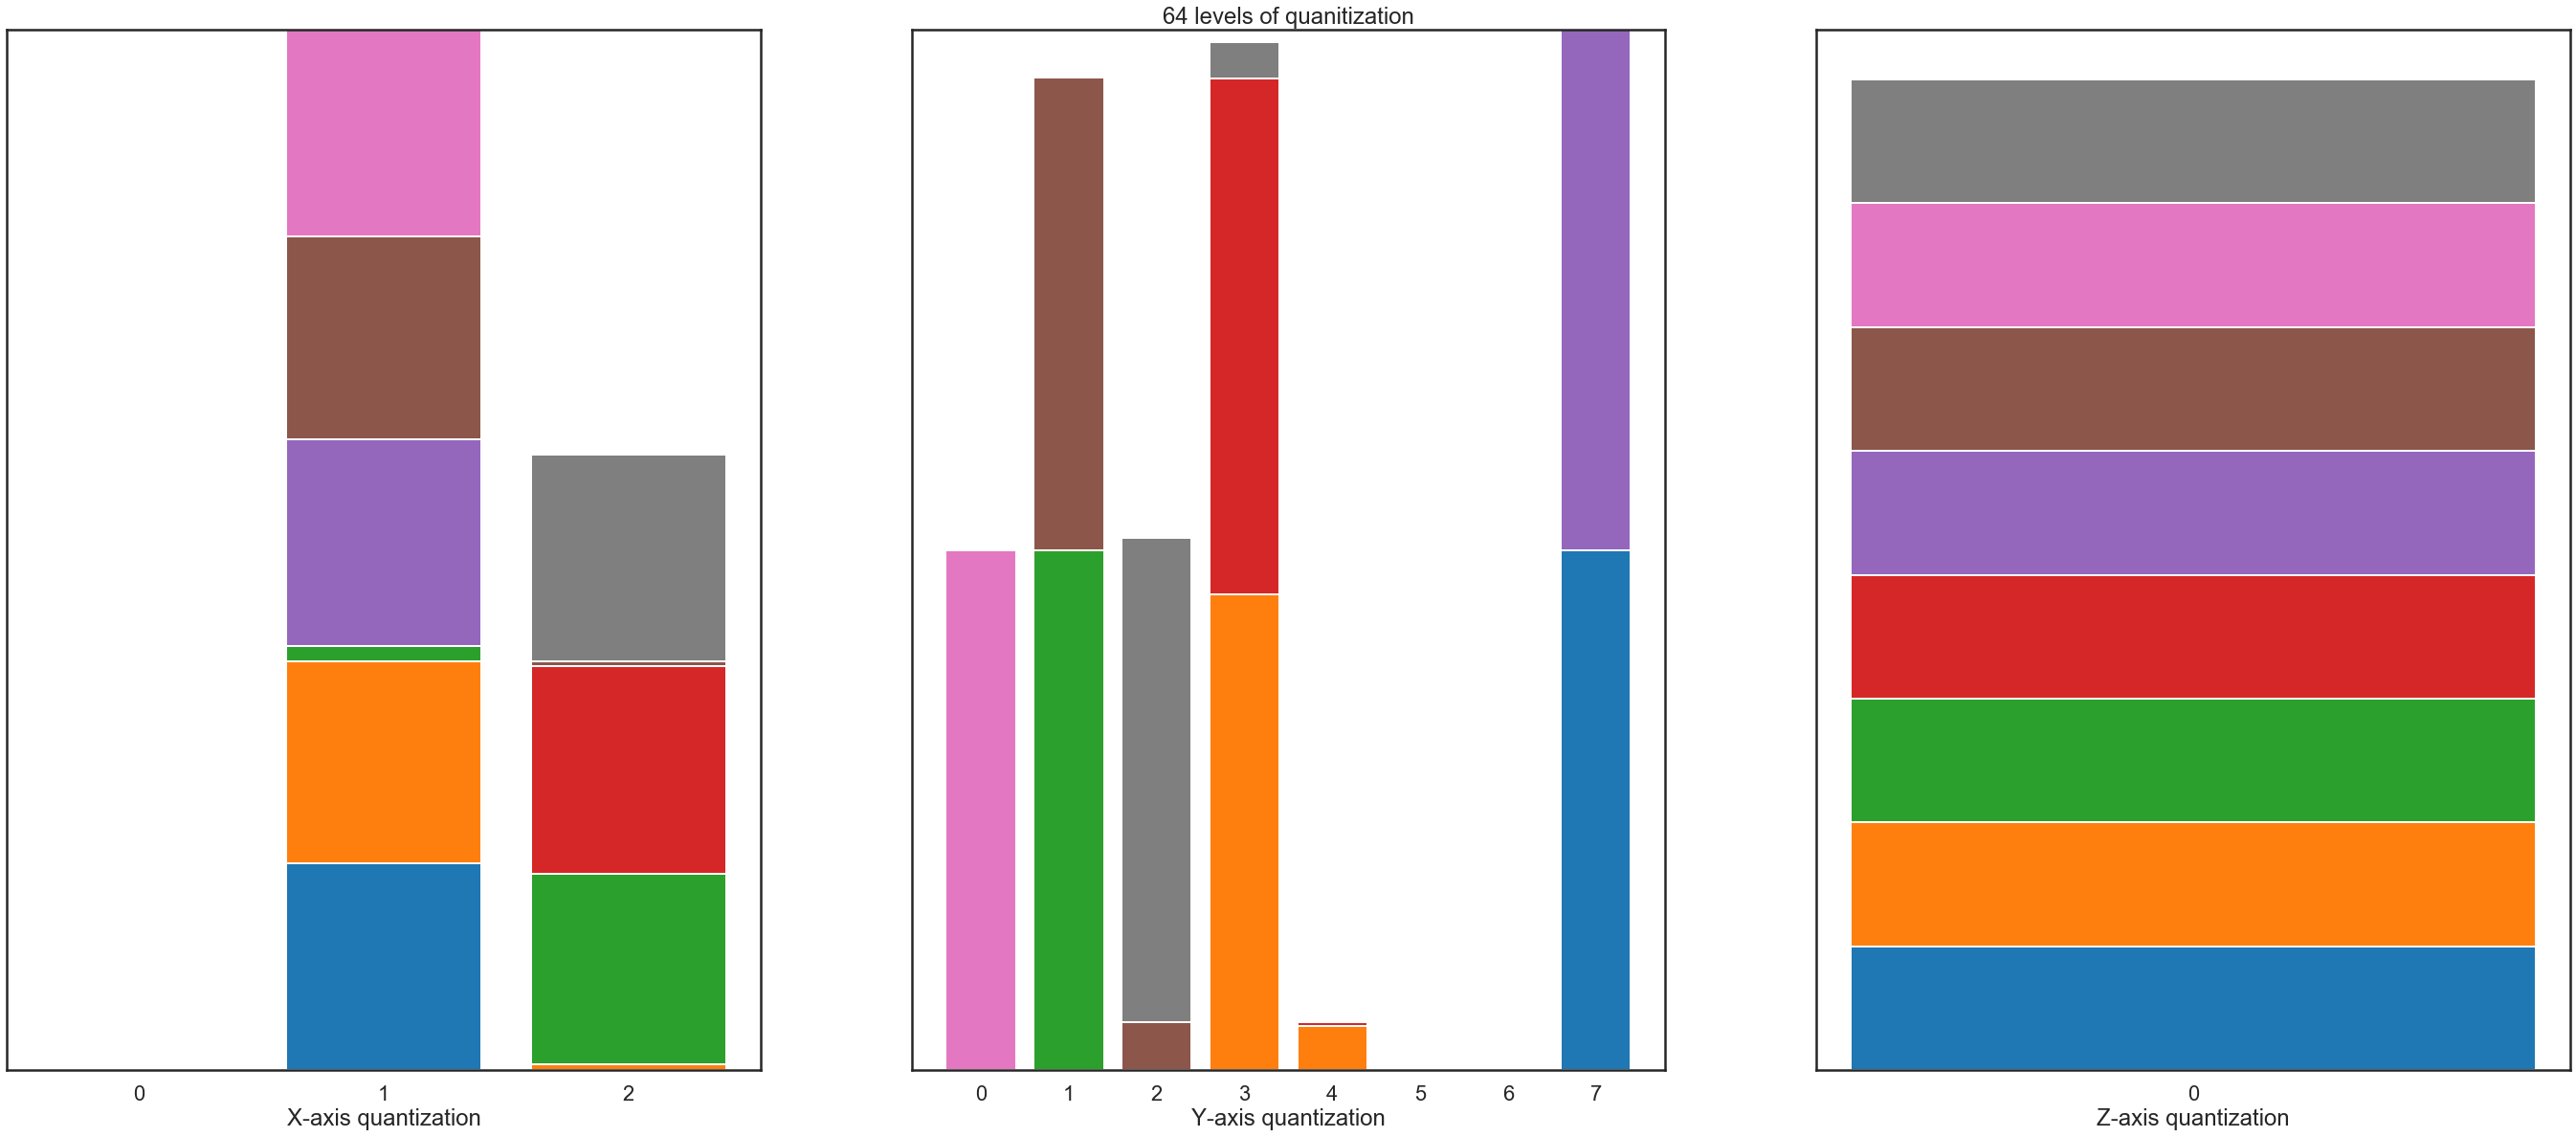

In [195]:
xN = 2
yN = 7
zN = 0

xIdx = np.round(((accFeat[:,0] + 1)/2)*xN)
xHist = np.zeros((xN+1,numPositions))
for p in range(numPositions):
    h = np.histogram(xIdx[posLabel==p],bins=list(range(xN+2)))
    xHist[:,p] = h[0]

yIdx = np.round(((accFeat[:,1] + 1)/2)*yN)
yHist = np.zeros((yN+1,numPositions))
for p in range(numPositions):
    h = np.histogram(yIdx[posLabel==p],bins=list(range(yN+2)))
    yHist[:,p] = h[0]

zIdx = np.round(((accFeat[:,2] + 1)/2)*zN)
zHist = np.zeros((zN+1,numPositions))
for p in range(numPositions):
    h = np.histogram(zIdx[posLabel==p],bins=list(range(zN+2)))
    zHist[:,p] = h[0]
    
f,ax = plt.subplots(1,3,figsize=(48,20))
xBot = np.zeros(len(xHist))
yBot = np.zeros(len(yHist))
zBot = np.zeros(len(zHist))
for p in range(numPositions):
    ax[0].bar(list(range(len(xHist))), xHist[:,p], bottom=xBot)
    ax[1].bar(list(range(len(yHist))), yHist[:,p], bottom=yBot)
    ax[2].bar(list(range(len(zHist))), zHist[:,p], bottom=zBot)
    xBot += xHist[:,p]
    yBot += yHist[:,p]
    zBot += zHist[:,p]

ax[0].set_xlabel('X-axis quantization')
ax[1].set_xlabel('Y-axis quantization')
ax[2].set_xlabel('Z-axis quantization')

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])

step = 1

ax[0].set_xticks(list(range(0,xN+1,step)))
ax[1].set_xticks(list(range(0,yN+1,step)))
ax[2].set_xticks(list(range(0,zN+1,step)))

ax[1].set_title('%d levels of quanitization' % (N+1))

plt.show()

In [224]:
def bipolarize(Y):
    X = np.copy(Y)
    X[X > 0] = 1.0
    X[X < 0] = -1.0
    X[X == 0] = np.random.choice([-1.0, 1.0], size=len(X[X == 0]))
    return X

def centroids(X,label=None):
    if label is not None:
        cLabel = np.unique(label)
        c = np.zeros((len(cLabel), X.shape[1]))
        for i,l in enumerate(cLabel):
            c[i,:] = bipolarize(np.sum(X[label==l],axis=0))
    else:
        c = bipolarize(np.sum(X,axis=0)).reshape(1,-1)
        cLabel = [0]
    return cLabel, c.astype('int')

def classify(v,am,metric):
    d = cdist(v,am,metric)
    label = np.argmin(d,axis=1)
    return label

In [225]:
dataFile = 'data.mat'

file = h5py.File(dataFile,'r')
experimentData = file['experimentData']
keys = list(experimentData.keys())

numTrials, numPositions, numGestures = experimentData[keys[0]].shape
D = file[experimentData[keys[4]][0,0,0]].shape[1]
numEx = 80
totalEx = numEx*numGestures*numPositions*numTrials

In [212]:
# ims = []

# im = np.zeros((xN+1,D))
# for x in range(xN+1):
#     im[x,:] = np.random.choice([-1.0, 1.0], size=D)
# ims.append(im)
    
# im = np.zeros((yN+1,D))
# for x in range(yN+1):
#     im[x,:] = np.random.choice([-1.0, 1.0], size=D)
# ims.append(im)

# im = np.zeros((zN+1,D))
# for x in range(zN+1):
#     im[x,:] = np.random.choice([-1.0, 1.0], size=D)
# ims.append(im)

# hv = np.zeros((totalEx,D),dtype=np.int8)
# gestLabel = np.zeros(totalEx,dtype=np.int8)
# posLabel = np.zeros(totalEx,dtype=np.int8)

# idx = np.arange(numEx).astype('int')
# for g in range(numGestures):
#     for p in range(numPositions):
#         for t in range(numTrials):
#             expLabel = file[experimentData['expGestLabel'][t,p,g]][0,:]
#             r = file[experimentData['emgHV'][t,p,g]][expLabel>0,:]
#             accFeat = file[experimentData['accFeat'][t,p,g]][:,expLabel>0].T
#             accIdx = np.round((accFeat + 1)/2*xN).astype('int')
#             accIdx[accIdx < 0] = 0
#             accIdx[accIdx > xN] = xN
#             xHV = ims[0][accIdx[:,0]]
            
#             accIdx = np.round((accFeat + 1)/2*yN).astype('int')
#             accIdx[accIdx < 0] = 0
#             accIdx[accIdx > yN] = yN
#             yHV = ims[1][accIdx[:,1]]
            
#             accIdx = np.round((accFeat + 1)/2*zN).astype('int')
#             accIdx[accIdx < 0] = 0
#             accIdx[accIdx > zN] = zN
#             zHV = ims[2][accIdx[:,2]]
#             hv[idx,:] = xHV*yHV*zHV

#             gestLabel[idx] = g
#             posLabel[idx] = p
#             idx += numEx



In [226]:
# for p in range(numPositions):
#     X = hv[posLabel == p]
#     d = cdist(X,X,'hamming')
#     f,ax = plt.subplots(figsize=(12,10))
#     sns.heatmap(d,vmin=0,vmax=1)

In [227]:
# posCent = centroids(hv,label=posLabel)
# d = cdist(posCent[1],posCent[1],'hamming')
# d

In [201]:
ims = []

im = np.zeros((xN+1,D))
for x in range(xN+1):
    im[x,:] = np.random.choice([-1.0, 1.0], size=D)
ims.append(im)
    
im = np.zeros((yN+1,D))
for x in range(yN+1):
    im[x,:] = np.random.choice([-1.0, 1.0], size=D)
ims.append(im)

im = np.zeros((zN+1,D))
for x in range(zN+1):
    im[x,:] = np.random.choice([-1.0, 1.0], size=D)
ims.append(im)

hv = np.zeros((totalEx,D),dtype=np.int8)
gestLabel = np.zeros(totalEx,dtype=np.int8)
posLabel = np.zeros(totalEx,dtype=np.int8)

idx = np.arange(numEx).astype('int')
for g in range(numGestures):
    for p in range(numPositions):
        for t in range(numTrials):
            expLabel = file[experimentData['expGestLabel'][t,p,g]][0,:]
            r = file[experimentData['emgHV'][t,p,g]][expLabel>0,:]
            accFeat = file[experimentData['accFeat'][t,p,g]][:,expLabel>0].T
            accIdx = np.round((accFeat + 1)/2*xN).astype('int')
            accIdx[accIdx < 0] = 0
            accIdx[accIdx > xN] = xN
            xHV = ims[0][accIdx[:,0]]
            
            accIdx = np.round((accFeat + 1)/2*yN).astype('int')
            accIdx[accIdx < 0] = 0
            accIdx[accIdx > yN] = yN
            yHV = ims[1][accIdx[:,1]]
            
            accIdx = np.round((accFeat + 1)/2*zN).astype('int')
            accIdx[accIdx < 0] = 0
            accIdx[accIdx > zN] = zN
            zHV = ims[2][accIdx[:,2]]
            hv[idx,:] = xHV*yHV*zHV*r

            gestLabel[idx] = g
            posLabel[idx] = p
            idx += numEx

# get list of unique values for each label
gestures = np.unique(gestLabel)
positions = np.unique(posLabel)

combGP, groupGP = np.unique(np.column_stack((gestLabel,posLabel)),axis=0,return_inverse=True)

numSplit = 10
skf = StratifiedKFold(n_splits=numSplit)

X = hv
y = gestLabel
c = posLabel
g = groupGP

accSingle = np.zeros((numPositions,numPositions,numSplit))
accSeparate = np.zeros((numPositions,numSplit))
accSuper = np.zeros((numPositions,numSplit))

splitIdx = 0

for trainIdx, testIdx in skf.split(X,g):
    print('Running iteration %d of %d...' % (splitIdx+1, numSplit))
    XTrain, XTest = X[trainIdx], X[testIdx]
    yTrain, yTest = y[trainIdx], y[testIdx]
    cTrain, cTest = c[trainIdx], c[testIdx]
    gTrain, gTest = g[trainIdx], g[testIdx]

    # generate a separate prototype for each arm position
    pLabel, p = centroids(XTrain,label=gTrain)

    # classify with each arm position only
    for pos in positions:
        AM = np.vstack([x for i,x in enumerate(p) if combGP[pLabel[i]][1] == pos])
        pred = classify(XTest,AM,'hamming')
        for posTest in positions:
            accSingle[pos,posTest,splitIdx] = accuracy_score(pred[cTest == posTest], yTest[cTest == posTest])

    # classify with all arm positions, separated
    pred = classify(XTest,p,'hamming')
    for posTest in positions:
        predLabel = [combGP[pr][0] for pr in pred[cTest == posTest]]
        accSeparate[posTest,splitIdx] = accuracy_score(predLabel,yTest[cTest == posTest])

    # classify with superimposed arm positions
    pLabel, p = centroids(XTrain,label=yTrain)
    pred = classify(XTest,p,'hamming')
    for posTest in positions:
        predLabel = [pLabel[pr] for pr in pred[cTest == posTest]]
        accSuper[posTest,splitIdx] = accuracy_score(predLabel,yTest[cTest == posTest])

    splitIdx += 1

accSingle = np.mean(accSingle,axis=2)
accSeparate = np.mean(accSeparate,axis=1)
accSuper = np.mean(accSuper,axis=1)

Running iteration 1 of 10...
Running iteration 2 of 10...
Running iteration 3 of 10...
Running iteration 4 of 10...
Running iteration 5 of 10...
Running iteration 6 of 10...
Running iteration 7 of 10...
Running iteration 8 of 10...
Running iteration 9 of 10...
Running iteration 10 of 10...


In [235]:
totalEx = numEx*numGestures*(numPositions-1)*numTrials

ims = []

im = np.zeros((xN+1,D))
for x in range(xN+1):
    im[x,:] = np.random.choice([-1.0, 1.0], size=D)
ims.append(im)
    
im = np.zeros((yN+1,D))
for x in range(yN+1):
    im[x,:] = np.random.choice([-1.0, 1.0], size=D)
ims.append(im)

im = np.zeros((zN+1,D))
for x in range(zN+1):
    im[x,:] = np.random.choice([-1.0, 1.0], size=D)
ims.append(im)

hv = np.zeros((totalEx,D),dtype=np.int8)
gestLabel = np.zeros(totalEx,dtype=np.int8)
posLabel = np.zeros(totalEx,dtype=np.int8)

idx = np.arange(numEx).astype('int')
for g in range(numGestures):
    for p in range(numPositions):
        if p != 4:
            for t in range(numTrials):
                expLabel = file[experimentData['expGestLabel'][t,p,g]][0,:]
                r = file[experimentData['emgHV'][t,p,g]][expLabel>0,:]
                accFeat = file[experimentData['accFeat'][t,p,g]][:,expLabel>0].T
                accIdx = np.round((accFeat + 1)/2*xN).astype('int')
                accIdx[accIdx < 0] = 0
                accIdx[accIdx > xN] = xN
                xHV = ims[0][accIdx[:,0]]

                accIdx = np.round((accFeat + 1)/2*yN).astype('int')
                accIdx[accIdx < 0] = 0
                accIdx[accIdx > yN] = yN
                yHV = ims[1][accIdx[:,1]]

                accIdx = np.round((accFeat + 1)/2*zN).astype('int')
                accIdx[accIdx < 0] = 0
                accIdx[accIdx > zN] = zN
                zHV = ims[2][accIdx[:,2]]
                hv[idx,:] = xHV*yHV*zHV*r

                gestLabel[idx] = g
                posLabel[idx] = p
                idx += numEx

# get list of unique values for each label
gestures = np.unique(gestLabel)
positions = np.unique(posLabel)

combGP, groupGP = np.unique(np.column_stack((gestLabel,posLabel)),axis=0,return_inverse=True)

numSplit = 10
skf = StratifiedKFold(n_splits=numSplit)

X = hv
y = gestLabel
c = posLabel
g = groupGP

accSingle = np.zeros((numPositions,numPositions,numSplit))
accSeparate = np.zeros((numPositions,numSplit))
accSuper = np.zeros((numPositions,numSplit))

splitIdx = 0

for trainIdx, testIdx in skf.split(X,g):
    print('Running iteration %d of %d...' % (splitIdx+1, numSplit))
    XTrain, XTest = X[trainIdx], X[testIdx]
    yTrain, yTest = y[trainIdx], y[testIdx]
    cTrain, cTest = c[trainIdx], c[testIdx]
    gTrain, gTest = g[trainIdx], g[testIdx]

    # generate a separate prototype for each arm position
    pLabel, p = centroids(XTrain,label=gTrain)

    # classify with each arm position only
    for pos in positions:
        AM = np.vstack([x for i,x in enumerate(p) if combGP[pLabel[i]][1] == pos])
        pred = classify(XTest,AM,'hamming')
        for posTest in positions:
            accSingle[pos,posTest,splitIdx] = accuracy_score(pred[cTest == posTest], yTest[cTest == posTest])

    # classify with all arm positions, separated
    pred = classify(XTest,p,'hamming')
    for posTest in positions:
        predLabel = [combGP[pr][0] for pr in pred[cTest == posTest]]
        accSeparate[posTest,splitIdx] = accuracy_score(predLabel,yTest[cTest == posTest])

    # classify with superimposed arm positions
    pLabel, p = centroids(XTrain,label=yTrain)
    pred = classify(XTest,p,'hamming')
    for posTest in positions:
        predLabel = [pLabel[pr] for pr in pred[cTest == posTest]]
        accSuper[posTest,splitIdx] = accuracy_score(predLabel,yTest[cTest == posTest])

    splitIdx += 1

accSingle = np.mean(accSingle,axis=2)
accSeparate = np.mean(accSeparate,axis=1)
accSuper = np.mean(accSuper,axis=1)

Running iteration 1 of 10...
Running iteration 2 of 10...
Running iteration 3 of 10...
Running iteration 4 of 10...
Running iteration 5 of 10...
Running iteration 6 of 10...
Running iteration 7 of 10...
Running iteration 8 of 10...
Running iteration 9 of 10...
Running iteration 10 of 10...


In [264]:
np.mean(accSuper)

0.7130208333333333

In [ ]:
# numSplit = 5
# skf = StratifiedKFold(n_splits=numSplit)

# knnAcc = 0
# rfAcc = 0
# mlpAcc = 0
# svmAcc = 0
# xgbAcc = 0
# for trainIdx, testIdx in skf.split(accFeat,groupLabel):
#     X_train, X_test = accFeat[trainIdx], accFeat[testIdx]
#     y_train, y_test = posLabel[trainIdx], posLabel[testIdx]
    
#     knn = KNeighborsClassifier()
#     knn.fit(X_train, y_train)
#     knnAcc += (knn.score(X_test, y_test))/numSplit
    
#     rf = RandomForestClassifier()
#     rf.fit(X_train, y_train)
#     rfAcc += (rf.score(X_test, y_test))/numSplit
    
#     mlp = MLPClassifier()
#     mlp.fit(X_train, y_train)
#     mlpAcc += (mlp.score(X_test, y_test))/numSplit
    
#     svm = SVC(decision_function_shape='ovr')
#     svm.fit(X_train, y_train)
#     svmAcc += (svm.score(X_test, y_test))/numSplit
    
#     xgb = XGBClassifier()
#     xgb.fit(X_train, y_train)
#     xgbAcc += (xgb.score(X_test, y_test))/numSplit
    
# print('K-Nearest Neighbors: %.2f%%' % (100*knnAcc))
# print('Random Forest: %.2f%%' % (100*rfAcc))
# print('Multi Layer Perceptron: %.2f%%' % (100*mlpAcc))
# print('Support Vector Machine: %.2f%%' % (100*svmAcc))
# print('XGBoost: %.2f%%' % (100*xgbAcc))